# Classification of text data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## the data can be found at kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [2]:
df=pd.read_csv('../data/airline_tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot: xlabel='airline', ylabel='count'>

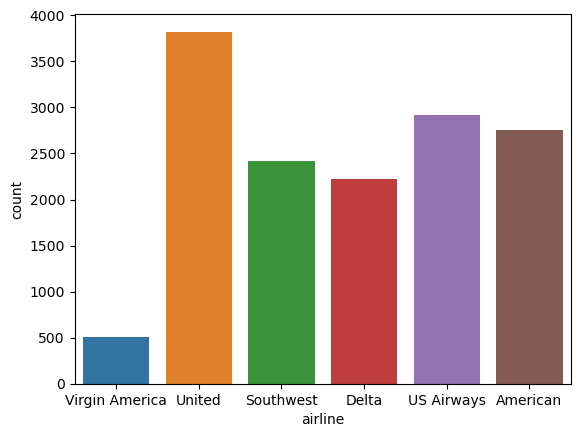

In [5]:
sns.countplot(df,x='airline')

<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

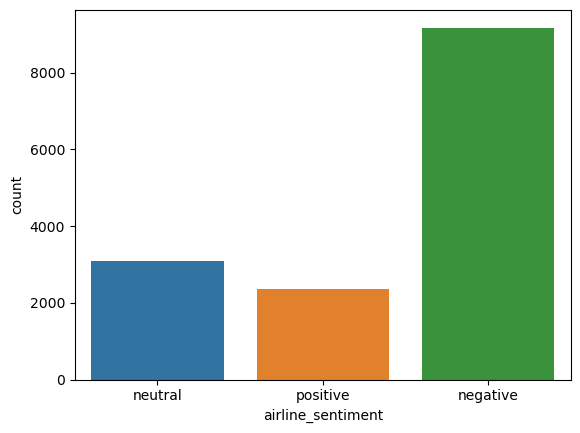

In [6]:
sns.countplot(df,x='airline_sentiment')

In [7]:
df=df[['airline_sentiment','text']]

In [8]:
x=df['text']
y=df['airline_sentiment']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

### TF-IDF (Term Frequency-Inverse Document Frequency) is a commonly used technique in Natural Language Processing (NLP) for determining the importance of each word in a document. It is used to vectorize a corpus (collection of documents) of textual data and transform it into a matrix representation that can be used in machine learning algorithms.

### TF-IDF assigns a score to each word in a document that is proportional to the frequency of the word in the document and inversely proportional to the frequency of the word in the corpus.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf=TfidfVectorizer(stop_words='english')

In [14]:
tf_X_train=tfidf.fit_transform(X_train)
tf_X_test=tfidf.transform(X_test)

### Multinomial Naive Bayes is a variant of the Naive Bayes algorithm that is commonly used in text classification problems. It is particularly well-suited for dealing with text data where each feature (i.e., word) can take on discrete values (e.g., the count of each word in a document).

### In Multinomial Naive Bayes, the probability of a document belonging to a particular class is computed using Bayes' theorem, which states that:

### P(class | document) = (P(class) * P(document | class)) / P(document)

### Where:

### P(class | document) is the probability of the document belonging to a particular class.
### P(class) is the prior probability of the class.
### P(document | class) is the likelihood of the document given the class.
### P(document) is the probability of the document.
### In Multinomial Naive Bayes, the likelihood of the document given the class is modeled as a multinomial distribution. This means that the count of each word in the document is assumed to follow a multinomial distribution, and the parameters of this distribution are estimated from the training data.

### During training, the algorithm computes the probabilities of each word occurring in each class, as well as the prior probabilities of each class. Then, during prediction, the algorithm uses these probabilities to compute the probability of the document belonging to each class and selects the class with the highest probability as the predicted class.

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
nb=MultinomialNB()

In [17]:
nb.fit(tf_X_train,y_train)

MultinomialNB()

In [18]:
from sklearn.linear_model import LogisticRegression

In [43]:
lo=LogisticRegression(max_iter=1000)

In [44]:
lo.fit(tf_X_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
from sklearn.svm import LinearSVC

In [22]:
svc=LinearSVC()

In [23]:
svc.fit(tf_X_train,y_train)

LinearSVC()

In [24]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

### creating a function to evaluate different models.

In [27]:
def report(model):
    preds=model.predict(tf_X_test)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_predictions(y_test,preds)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.80      2738
     neutral       0.78      0.15      0.25       947
    positive       0.91      0.15      0.26       707

    accuracy                           0.68      4392
   macro avg       0.78      0.43      0.43      4392
weighted avg       0.73      0.68      0.59      4392



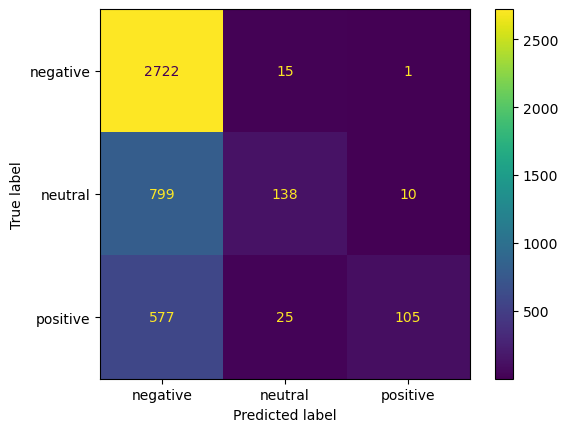

In [28]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      2738
     neutral       0.64      0.47      0.54       947
    positive       0.81      0.57      0.67       707

    accuracy                           0.77      4392
   macro avg       0.75      0.66      0.69      4392
weighted avg       0.77      0.77      0.76      4392



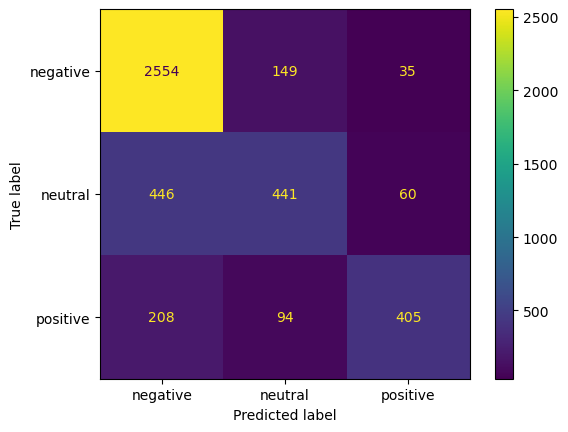

In [29]:
report(lo)

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      2738
     neutral       0.62      0.51      0.56       947
    positive       0.75      0.64      0.69       707

    accuracy                           0.78      4392
   macro avg       0.73      0.68      0.70      4392
weighted avg       0.77      0.78      0.77      4392



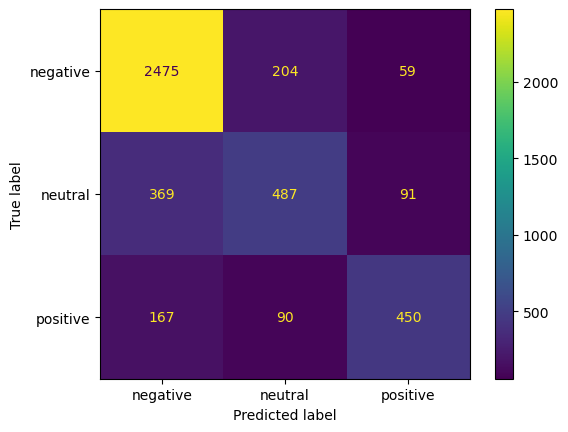

In [30]:
report(svc)

### we can see that LinearSVC is performing better than other models so we will create a pipeline.

In [31]:
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [37]:
pipe.fit(x,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [38]:
new=['good flight']

In [39]:
pipe.predict(new)

array(['positive'], dtype=object)

In [41]:
new1=['bad flight']

In [42]:
pipe.predict(new1)

array(['negative'], dtype=object)

### we can see that model is predicting good on new data.